In [1]:
#importing some necessary libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,  Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#ignoring the warnings

import warnings
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
warnings.filterwarnings('ignore',category = RuntimeWarning)
warnings.filterwarnings('ignore',category = FutureWarning)

In [3]:
#loading data into the program

df = pd.read_csv(r'C:\Users\User\Divya\Cement_data.csv')

In [4]:
#printing the data only top 5
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
len(df)

1030

In [6]:
#Simplifying Column names, since they appear to be too lengthy.

req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer","CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]

curr_col_names = list(df.columns)

mapper = {}
for i,name in enumerate(curr_col_names):
  mapper[name] = req_col_names[i]

df = df.rename(columns=mapper)

In [7]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
df.shape

(1030, 9)

## DATA CLEANING
### CHECKING FOR NULL VALUES

In [9]:
df.isnull().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BlastFurnaceSlag  1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregate     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CC_Strength       1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## exploratory data analysis
### exploring the data

In [11]:
df.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## checking the pairwise relations
### multi variate analysis

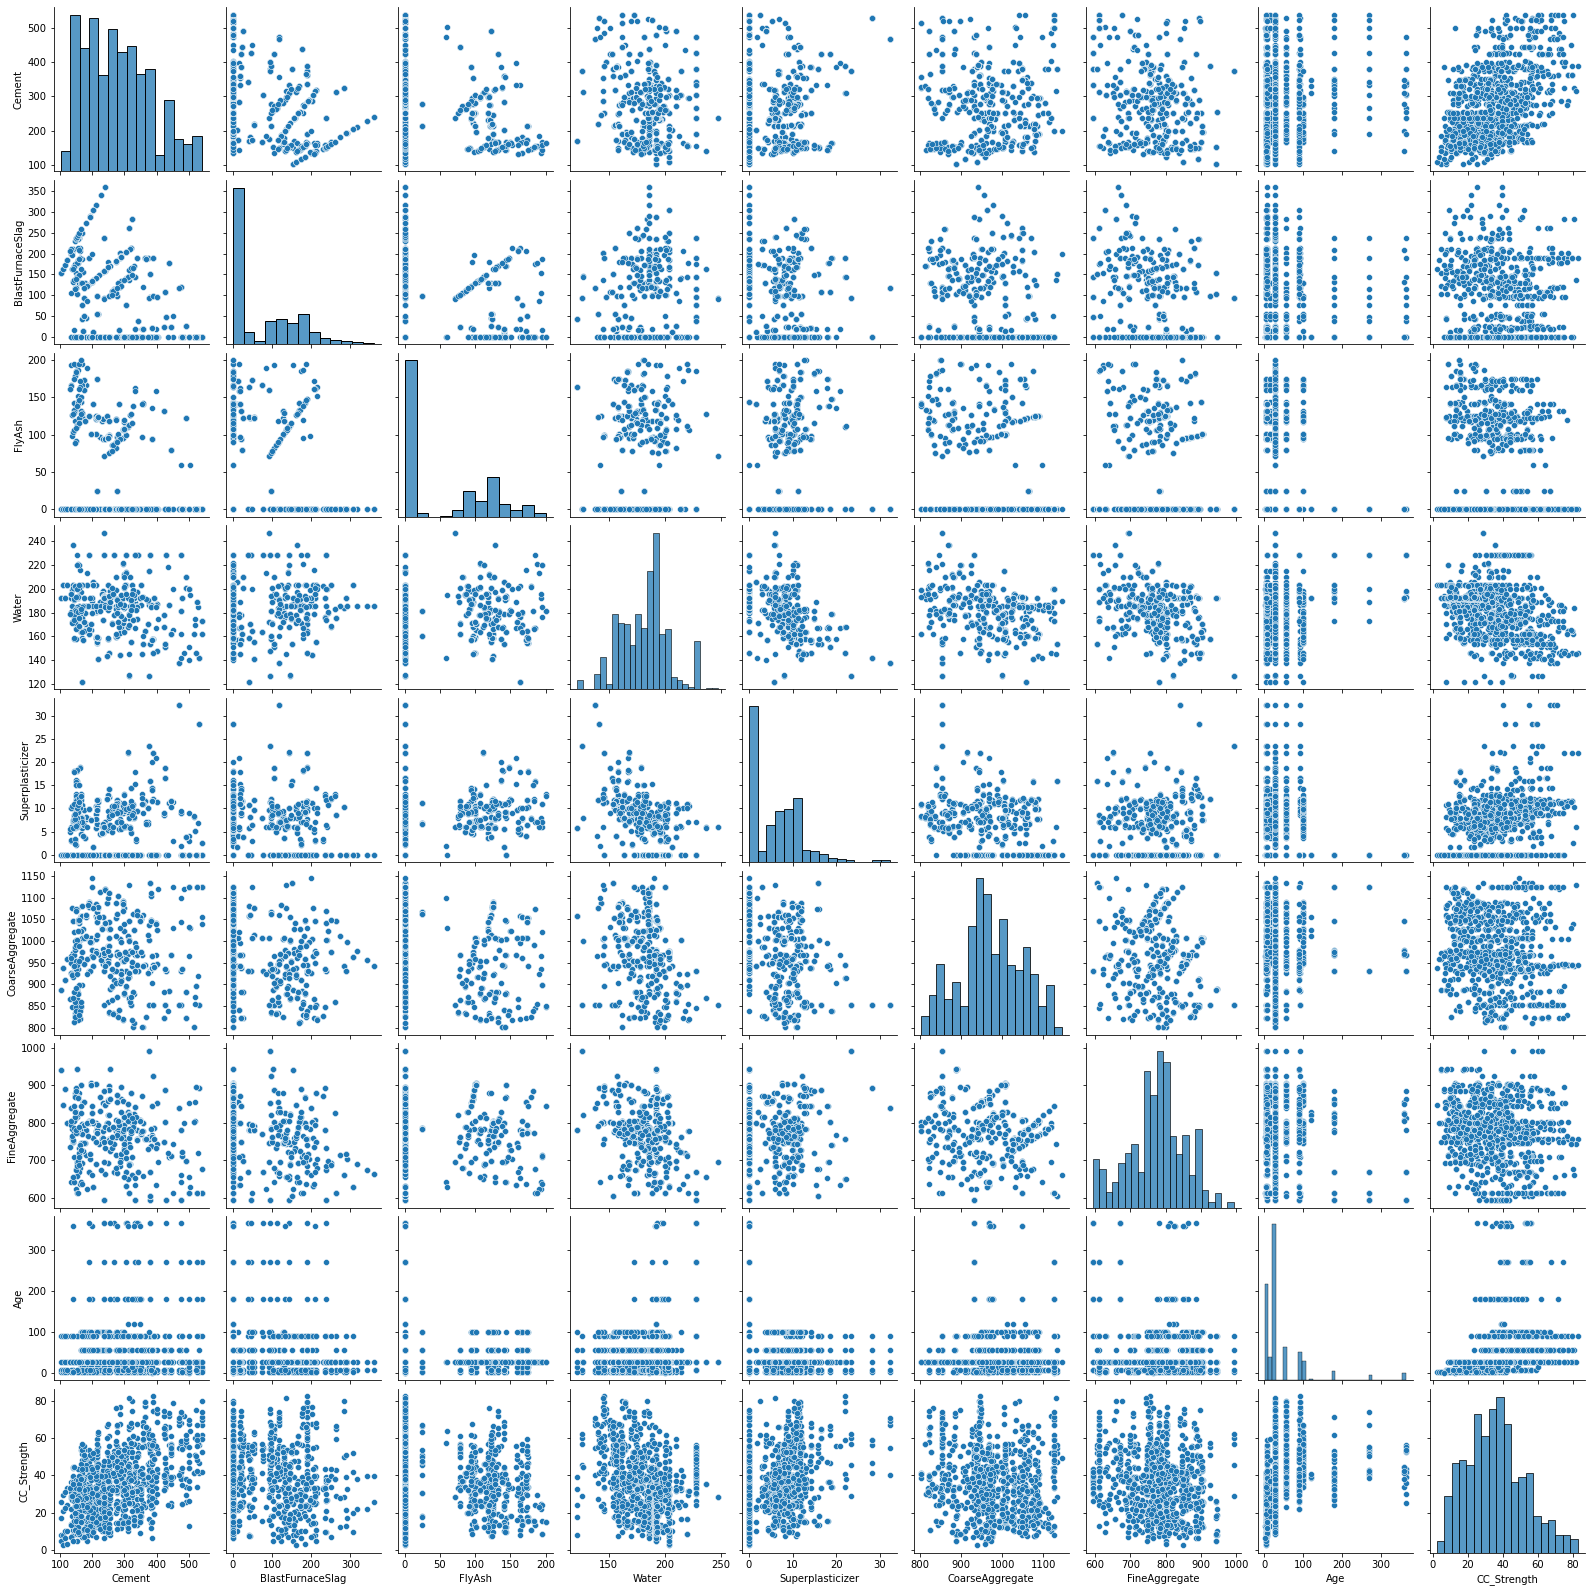

In [12]:
sns.pairplot(df)
plt.show()

There seems to be no high correlation between independant variables (features). This can be further confirmed by plotting the Pearson Correlation coefficients between the features.

In [13]:
correlation_matrix = df.corr()

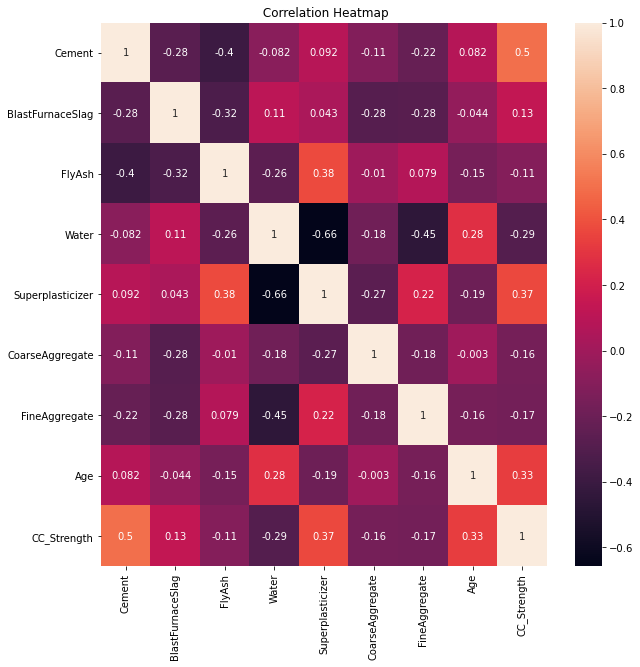

In [14]:
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlation_matrix, annot = True)
plt.title(" Correlation Heatmap")
plt.show()

#### Observations
There is no any high correlations between Compressive strength and other features except for Cement, which should be the case for more strength. Age and Super plasticizer are the other two features which are strongly correlated with Compressive Strength. Super Plasticizer seems to have a negative high correlation with Water, positive correlations with Fly ash and Fine aggregate.

In [15]:
def corrwithtarget(data,tcol):
    ind_var = data.drop([tcol],axis = 1).columns
    corr_result = []
    for col in ind_var:
        corr_result.append(data[tcol].corr(data[col]))
    view_col = pd.DataFrame([ind_var,corr_result], index = ['variable','correlation'])
    return view_col

In [16]:
corrwithtarget(df,'CC_Strength')

,0,1,2,3,4,5,6,7
variable,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
correlation,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873


### Check for outliers

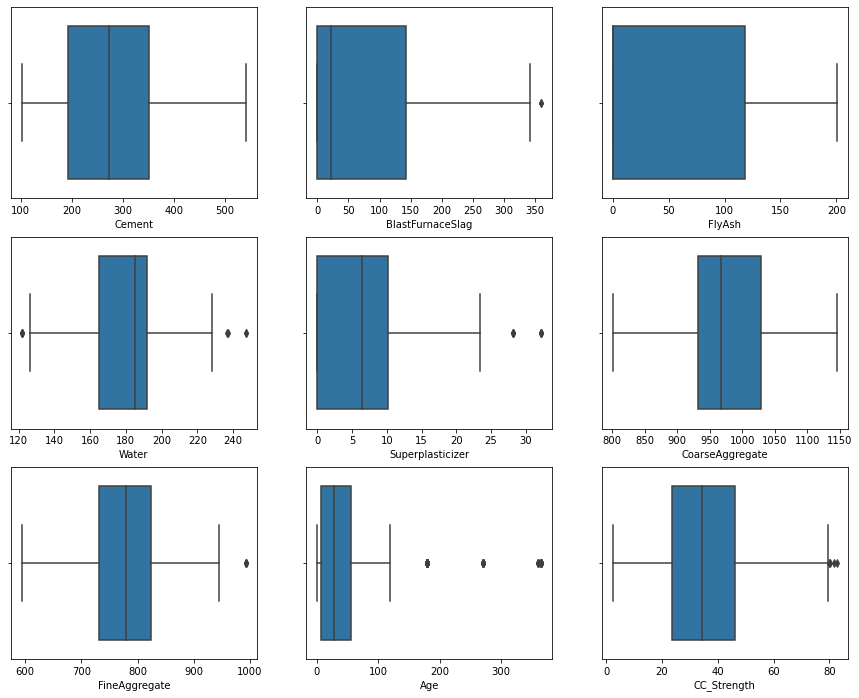

In [17]:
fig, axes = plt.subplots(3, 3, figsize = (15,12));
col_cnt = 0
col_names = df.columns.tolist()
for r in range(3):
    for c in range(3):
        try:
            sns.boxplot(df[col_names[col_cnt]], ax=axes[r][c], orient="h");
            col_cnt += 1
        except:
            pass

In [18]:
df_summary = df.describe()
df_summary


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [19]:
outlier_cols = ["FineAggregate","BlastFurnaceSlag","Water","Superplasticizer", "Age","CC_Strength"]
def cap_outliers(df, col):
    q1 = df_summary[col].loc["25%"]
    q3 = df_summary[col].loc["75%"]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df.loc[df[col] < lower_bound, col] = df_summary[col].loc["mean"]
    df.loc[df[col] > upper_bound, col] = df_summary[col].loc["mean"]
    return df
    
    
for col in outlier_cols:
    df = cap_outliers(df, col)

In [20]:
# creating feature and label

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

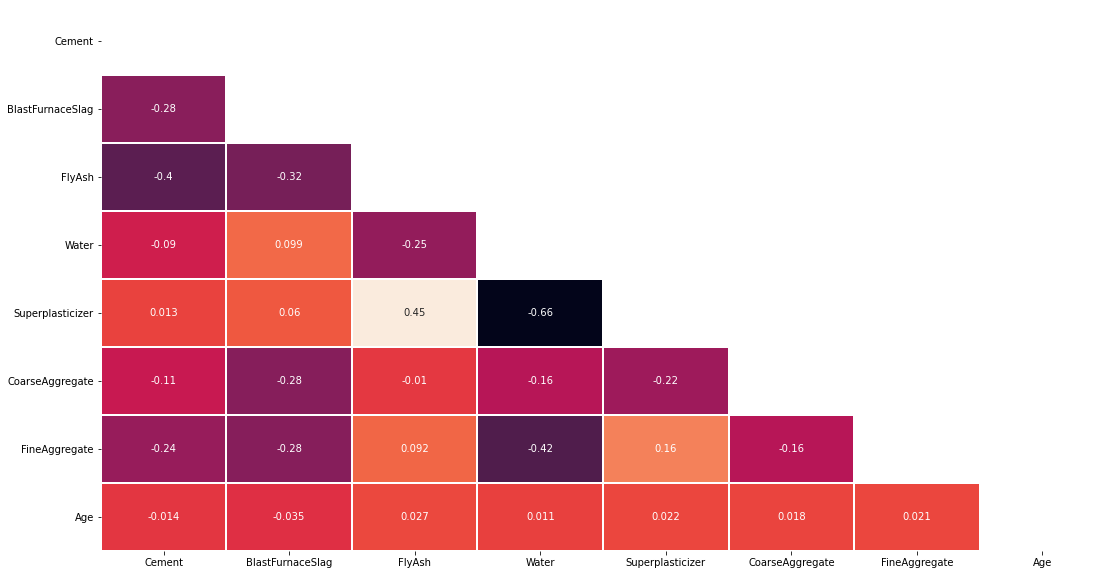

In [21]:
plt.figure(figsize = (18, 10))

corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1, cbar = False)
plt.show()

In [22]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [23]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 


### Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
lr.score(X_train, y_train)

0.729244682045034

In [26]:
lr.score(X_test, y_test)

0.7287081385230666

### Lasso Regression

In [27]:
from sklearn.linear_model import Lasso, LassoCV

In [28]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [29]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.000304760711627572)

In [30]:
lasso.score(X_train, y_train)


0.7292446779548754

In [31]:
lasso.score(X_test, y_test)

0.7287006355412657

### Decision Tree Regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
dtr.score(X_train, y_train)

0.9943599128783703

In [34]:
dtr.score(X_test, y_test)

0.8667635272896902

In [35]:
# Hyper Parameter Tuning Decision Tree Regressor

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['mse', 'friedman_mse', 'mae'],
    'splitter' : ['best', 'random'],
    'max_depth' : [3, 5, 7, 9, 10],
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(dtr, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 3608 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 3750 out of 3750 | elapsed:   25.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [36]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
0.7883347258210834


In [37]:
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random')
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, splitter='random')

In [38]:
dtr.score(X_train, y_train)

0.9530922468076379

In [39]:
dtr.score(X_test, y_test)

0.763648130495784

### Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
rfr.score(X_train, y_train)

0.9795028301288322

In [42]:
rfr.score(X_test, y_test)

0.909984258993142

### Ada Boost

In [43]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(base_estimator = dtr)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=10,
                                                       splitter='random'))

In [44]:
ada.score(X_train, y_train)

0.9620017128036893

In [45]:
ada.score(X_test, y_test)

0.8870209903757154

In [46]:
# hyper parameter tuning 

grid_params = {
    'n_estimators' : [40, 50, 80, 100],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1, 10],
    'loss' : ['linear','square', 'exponential']
}

grid_search = GridSearchCV(ada, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   38.6s finished


GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                                              max_depth=10,
                                                                              splitter='random')),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [40, 50, 80, 100]},
             verbose=1)

In [47]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 80}
0.8641717949164764


In [48]:
ada = AdaBoostRegressor(base_estimator = dtr, learning_rate = 1, loss = 'exponential', n_estimators = 100)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=10,
                                                       splitter='random'),
                  learning_rate=1, loss='exponential', n_estimators=100)

In [49]:
ada.score(X_train, y_train)

0.9241499534375984

In [50]:
ada.score(X_test, y_test)

0.8404792275415968

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [52]:
gbr.score(X_train, y_train)

0.9404675393044645

In [53]:
gbr.score(X_test, y_test)

0.8912374579608029

In [54]:
#hyper parameter tuning of gradient boost regressor

grid_params = {
    'n_estimators': [90, 100, 120, 180, 200],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1],
    'loss' : ['ls', 'lad', 'huber', 'quantile']
}

grid_search = GridSearchCV(gbr, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'n_estimators': [90, 100, 120, 180, 200]},
             verbose=1)

In [55]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 200}
0.8756074571077821


In [56]:
gbr = GradientBoostingRegressor(learning_rate = 0.5, loss = 'ls', n_estimators = 200)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=200)

In [57]:
gbr.score(X_train, y_train)

0.9905803803853631

In [58]:
gbr.score(X_test, y_test)

0.8975039574925288

### XgBoost Regressor

In [59]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
xgb.score(X_train, y_train)

0.9937279588856573

In [61]:
xgb.score(X_test, y_test)

0.9369426725594598

In [62]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XgBoost'],
    'Score' : [lr.score(X_test, y_test), lasso.score(X_test, y_test), dtr.score(X_test, y_test), rfr.score(X_test, y_test), ada.score(X_test, y_test),
               gbr.score(X_test, y_test), xgb.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,XgBoost,0.936943
3,Random Forest,0.909984
5,Gradient Boost,0.897504
4,Ada Boost,0.840479
2,Decision Tree,0.763648
0,Linear Regression,0.728708
1,Lasso Regression,0.728701


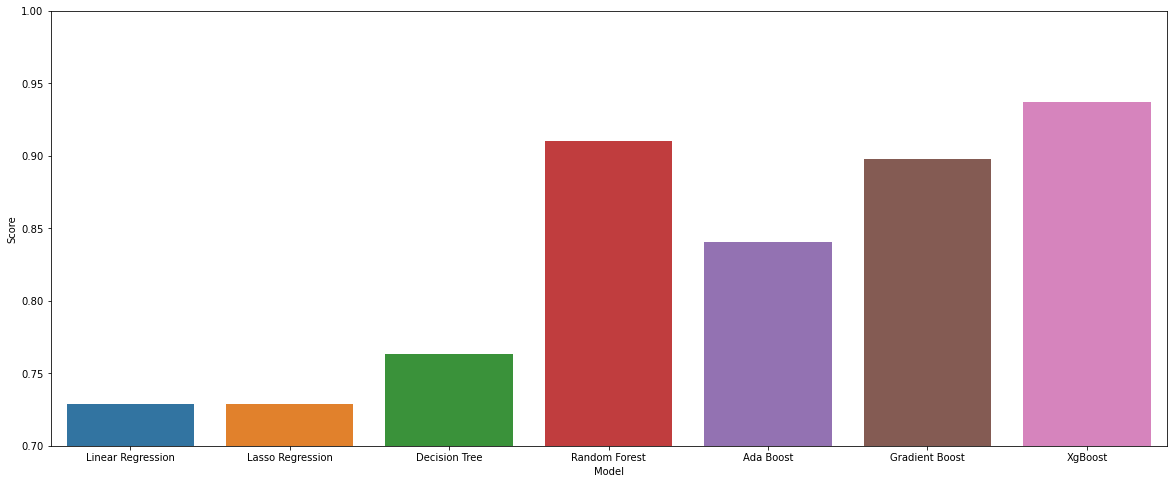

In [63]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.70, 1)
plt.show()

Here, XGBoost Regressor gives maximum 93% Accuracy.
